# Data Set Information
### Data were extracted from images that were taken from genuine and forged banknote-like specimens. For digitization, an industrial camera usually used for print inspection was used. The final images have 400x 400 pixels. Due to the object lens and distance to the investigated object gray-scale pictures with a resolution of about 660 dpi were gained. Wavelet Transform tool were used to extract features from images.

In [2]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd 
import neurolab as nl
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import svm
from sklearn import preprocessing
from yellowbrick.cluster import KElbowVisualizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from keras.layers import Dropout
import tensorflow as tf

In [3]:
#read data
data = pd.read_csv('banknote_data.txt')
data.head()

,variance,skewness,curtosis,entropy,target
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [4]:
#check for missing values in each column
data.isnull().sum()

variance    0
skewness    0
curtosis    0
entropy     0
target      0
dtype: int64

<AxesSubplot:>

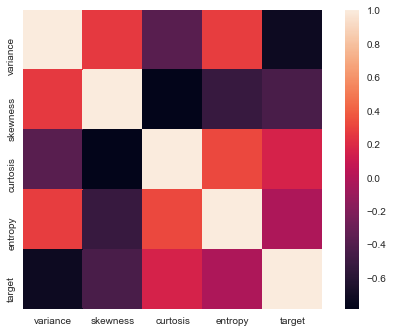

In [5]:
#separate variables into new data frames
numeric_data = data.select_dtypes(include=[np.number])
#correlation plot
corr = numeric_data.corr()
sns.heatmap(corr, square=True)

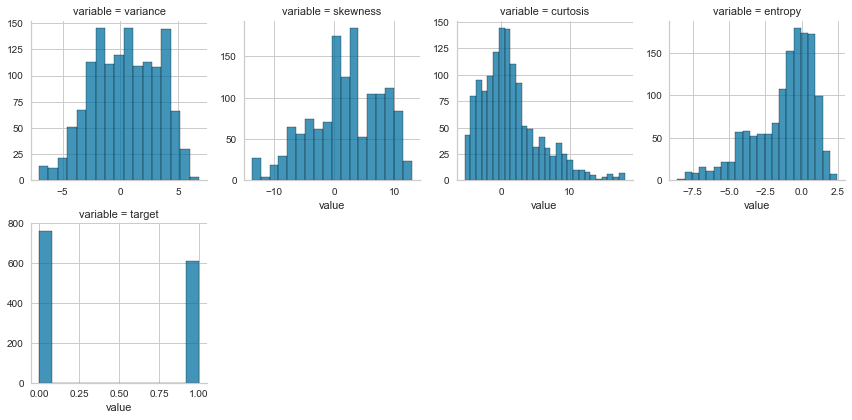

In [6]:
#create numeric plots
num = [f for f in data.columns if data.dtypes[f] != 'object']
nd = pd.melt(data, value_vars = num)
n1 = sns.FacetGrid (nd, col='variable', col_wrap=4, sharex=False, sharey = False)
n1 = n1.map(sns.histplot, 'value')
n1

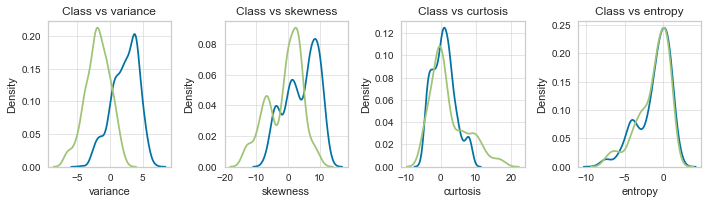

In [7]:
col_names = data.drop('target', axis = 1).columns.tolist()

plt.figure(figsize = (10,3))
i = 0
for col in col_names:
    plt.subplot(1,4,i+1)
    plt.grid(True, alpha =0.5)
    sns.kdeplot(data[col][data['target'] ==0], label = 'Fake')
    sns.kdeplot(data[col][data['target'] ==1], label = 'Original')
    plt.title('Class vs ' + col)
    plt.tight_layout()
    i+=1
plt.show()

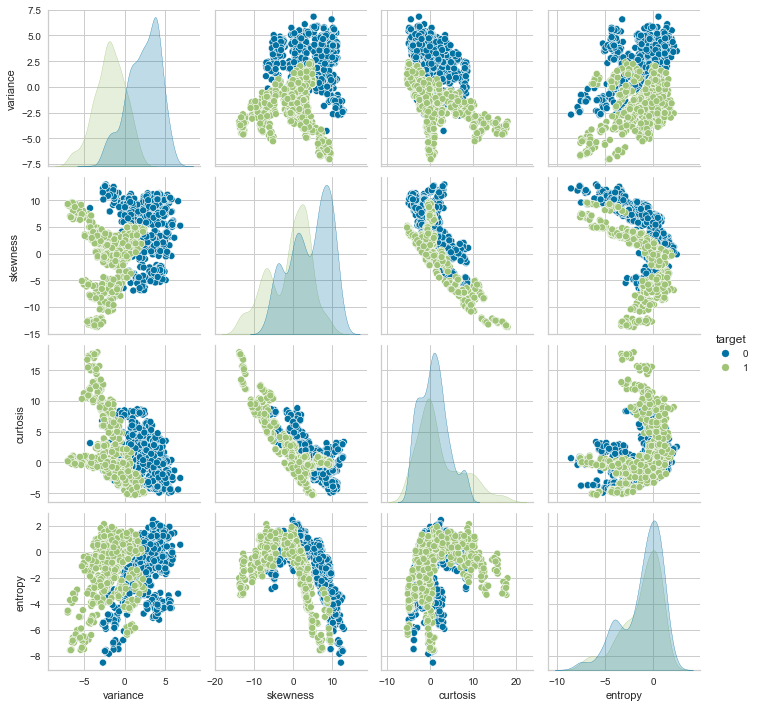

In [8]:
sns.pairplot(data, hue="target")

In [9]:
#training and test datasets
X = data[["variance","skewness","curtosis","entropy"]]
y = data["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [10]:
#scaling
min_max_scaler = preprocessing.MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_test= min_max_scaler.fit_transform(X_test)

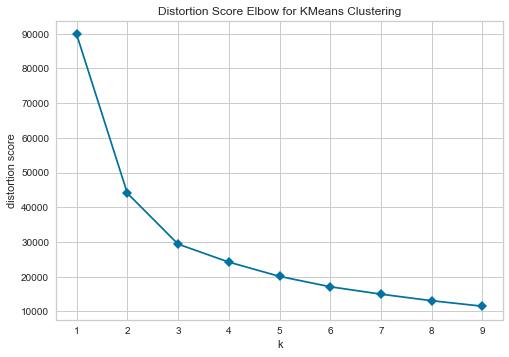

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [11]:
#elbow method
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10), timings=False ,locate_elbow=False)
visualizer.fit(X) # Fit the data to the visualizer
visualizer.show() # Finalize and render the figure

In [12]:
net = nl.net.newc(nl.tool.minmax(X),3)
error = net.trainf = nl.train.train_cwta(net, X, epochs = 500,show = 100)

Epoch: 100; Error: 11842.21561028315;
Epoch: 200; Error: 11842.21561028315;
Epoch: 300; Error: 11842.21561028315;
Epoch: 400; Error: 11842.21561028315;
Epoch: 500; Error: 11842.21561028315;
The maximum number of train epochs is reached


In [38]:
#sequential model testing
model = tf.keras.Sequential()

model.add(Dropout(0.2, input_shape=(4,)))

#input layers
model.add(tf.keras.layers.Dense(100, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(50, activation=tf.nn.relu))

#Output Layer
model.add(tf.keras.layers.Dense(1, activation=tf.nn.sigmoid))

#Create a Keras version Optimiser
optimizer = tf.keras.optimizers.Adam()

#Compile and print the summary of model
model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics =['accuracy'])

model.fit(X_train, y_train,epochs=1000)
# Model summary 
model.summary()
tf.keras.utils.plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

Epoch 1/1000
30/30 [==============================] - 1s 1ms/step - loss: 0.6608 - accuracy: 0.6031
Epoch 2/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.6144 - accuracy: 0.6615
Epoch 3/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.5837 - accuracy: 0.7010
Epoch 4/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.5633 - accuracy: 0.7031
Epoch 5/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.5591 - accuracy: 0.7042
Epoch 6/1000
30/30 [==============================] - 0s 2ms/step - loss: 0.5224 - accuracy: 0.7167
Epoch 7/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.4841 - accuracy: 0.7646
Epoch 8/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.4506 - accuracy: 0.7990
Epoch 9/1000
30/30 [==============================] - 0s 2ms/step - loss: 0.4230 - accuracy: 0.8250
Epoch 10/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.4113 - accuracy: 0.8302

30/30 [==============================] - 0s 1ms/step - loss: 0.1800 - accuracy: 0.9167
Epoch 83/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.1742 - accuracy: 0.9177
Epoch 84/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.2066 - accuracy: 0.8969
Epoch 85/1000
30/30 [==============================] - 0s 963us/step - loss: 0.1899 - accuracy: 0.9115
Epoch 86/1000
30/30 [==============================] - 0s 997us/step - loss: 0.1655 - accuracy: 0.9271
Epoch 87/1000
30/30 [==============================] - 0s 997us/step - loss: 0.1713 - accuracy: 0.9156
Epoch 88/1000
30/30 [==============================] - 0s 997us/step - loss: 0.1984 - accuracy: 0.9021
Epoch 89/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.1717 - accuracy: 0.9250
Epoch 90/1000
30/30 [==============================] - 0s 929us/step - loss: 0.1490 - accuracy: 0.9385
Epoch 91/1000
30/30 [==============================] - 0s 997us/step - loss: 0.1540 - accuracy:

30/30 [==============================] - 0s 1ms/step - loss: 0.1337 - accuracy: 0.9375
Epoch 163/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.1460 - accuracy: 0.9312
Epoch 164/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.1337 - accuracy: 0.9438
Epoch 165/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.1541 - accuracy: 0.9229
Epoch 166/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.1521 - accuracy: 0.9333
Epoch 167/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.1353 - accuracy: 0.9438
Epoch 168/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.1520 - accuracy: 0.9219
Epoch 169/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.1385 - accuracy: 0.9312
Epoch 170/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.1567 - accuracy: 0.9281
Epoch 171/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.1349 - accuracy: 0.

30/30 [==============================] - 0s 1ms/step - loss: 0.1395 - accuracy: 0.9260
Epoch 243/1000
30/30 [==============================] - 0s 2ms/step - loss: 0.1202 - accuracy: 0.9469
Epoch 244/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.1252 - accuracy: 0.9375
Epoch 245/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.1306 - accuracy: 0.9375
Epoch 246/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.1258 - accuracy: 0.9448
Epoch 247/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.1507 - accuracy: 0.9229
Epoch 248/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.1127 - accuracy: 0.9563
Epoch 249/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.1169 - accuracy: 0.9365
Epoch 250/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.1305 - accuracy: 0.9312
Epoch 251/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.1179 - accuracy: 0.

30/30 [==============================] - 0s 1ms/step - loss: 0.1295 - accuracy: 0.9417
Epoch 323/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.1194 - accuracy: 0.9438
Epoch 324/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.1428 - accuracy: 0.9250
Epoch 325/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.1176 - accuracy: 0.9375
Epoch 326/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.1176 - accuracy: 0.9406
Epoch 327/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.1388 - accuracy: 0.9375
Epoch 328/1000
30/30 [==============================] - 0s 997us/step - loss: 0.1187 - accuracy: 0.9469
Epoch 329/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.1332 - accuracy: 0.9344
Epoch 330/1000
30/30 [==============================] - 0s 963us/step - loss: 0.1313 - accuracy: 0.9375
Epoch 331/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.1431 - accuracy

30/30 [==============================] - 0s 1ms/step - loss: 0.1290 - accuracy: 0.9385
Epoch 403/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.1174 - accuracy: 0.9417
Epoch 404/1000
30/30 [==============================] - 0s 929us/step - loss: 0.1220 - accuracy: 0.9438
Epoch 405/1000
30/30 [==============================] - 0s 997us/step - loss: 0.1318 - accuracy: 0.9323
Epoch 406/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.1171 - accuracy: 0.9438
Epoch 407/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.1430 - accuracy: 0.9302
Epoch 408/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.1066 - accuracy: 0.9469
Epoch 409/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.1332 - accuracy: 0.9271
Epoch 410/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.1243 - accuracy: 0.9375
Epoch 411/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.1191 - accuracy

30/30 [==============================] - 0s 1ms/step - loss: 0.1092 - accuracy: 0.9479
Epoch 482/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.1337 - accuracy: 0.9302
Epoch 483/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.1282 - accuracy: 0.9281
Epoch 484/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.1265 - accuracy: 0.9354
Epoch 485/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.1062 - accuracy: 0.9490
Epoch 486/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.1323 - accuracy: 0.9333
Epoch 487/1000
30/30 [==============================] - 0s 997us/step - loss: 0.1282 - accuracy: 0.9458
Epoch 488/1000
30/30 [==============================] - 0s 997us/step - loss: 0.1229 - accuracy: 0.9427
Epoch 489/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.1197 - accuracy: 0.9417
Epoch 490/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.1185 - accuracy

30/30 [==============================] - 0s 1ms/step - loss: 0.1234 - accuracy: 0.9438
Epoch 562/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.1069 - accuracy: 0.9490
Epoch 563/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.1118 - accuracy: 0.9417
Epoch 564/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.1197 - accuracy: 0.9479
Epoch 565/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.1172 - accuracy: 0.9427
Epoch 566/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.1117 - accuracy: 0.9479
Epoch 567/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.1075 - accuracy: 0.9500
Epoch 568/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.1134 - accuracy: 0.9458
Epoch 569/1000
30/30 [==============================] - 0s 963us/step - loss: 0.1151 - accuracy: 0.9427
Epoch 570/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.1300 - accuracy: 

30/30 [==============================] - 0s 1ms/step - loss: 0.1200 - accuracy: 0.9417
Epoch 642/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.1247 - accuracy: 0.9427
Epoch 643/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.1108 - accuracy: 0.9490
Epoch 644/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.1237 - accuracy: 0.9396
Epoch 645/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.1171 - accuracy: 0.9448
Epoch 646/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.1171 - accuracy: 0.9396
Epoch 647/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.1112 - accuracy: 0.9438
Epoch 648/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.0952 - accuracy: 0.9573
Epoch 649/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.0989 - accuracy: 0.9573
Epoch 650/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.1162 - accuracy: 0.

30/30 [==============================] - 0s 1ms/step - loss: 0.1150 - accuracy: 0.9469
Epoch 722/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.0968 - accuracy: 0.9542
Epoch 723/1000
30/30 [==============================] - 0s 963us/step - loss: 0.1175 - accuracy: 0.9458
Epoch 724/1000
30/30 [==============================] - 0s 997us/step - loss: 0.1132 - accuracy: 0.9458
Epoch 725/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.1110 - accuracy: 0.9438
Epoch 726/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.1490 - accuracy: 0.9198
Epoch 727/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.1125 - accuracy: 0.9469
Epoch 728/1000
30/30 [==============================] - 0s 963us/step - loss: 0.1205 - accuracy: 0.9427
Epoch 729/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.1100 - accuracy: 0.9469
Epoch 730/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.1153 - accura

30/30 [==============================] - 0s 1ms/step - loss: 0.1044 - accuracy: 0.9552
Epoch 802/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.0945 - accuracy: 0.9531
Epoch 803/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.1200 - accuracy: 0.9479
Epoch 804/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.1031 - accuracy: 0.9458
Epoch 805/1000
30/30 [==============================] - 0s 963us/step - loss: 0.1180 - accuracy: 0.9458
Epoch 806/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.1054 - accuracy: 0.9490
Epoch 807/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.1160 - accuracy: 0.9458
Epoch 808/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.1140 - accuracy: 0.9479
Epoch 809/1000
30/30 [==============================] - 0s 997us/step - loss: 0.1348 - accuracy: 0.9271
Epoch 810/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.0925 - accuracy

30/30 [==============================] - 0s 1ms/step - loss: 0.1086 - accuracy: 0.9406
Epoch 881/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.1183 - accuracy: 0.9438
Epoch 882/1000
30/30 [==============================] - 0s 928us/step - loss: 0.1126 - accuracy: 0.9365
Epoch 883/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.1052 - accuracy: 0.9510
Epoch 884/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.1038 - accuracy: 0.9552
Epoch 885/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.1074 - accuracy: 0.9458
Epoch 886/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.0991 - accuracy: 0.9500
Epoch 887/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.1029 - accuracy: 0.9479
Epoch 888/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.1101 - accuracy: 0.9490
Epoch 889/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.1305 - accuracy: 

30/30 [==============================] - 0s 1ms/step - loss: 0.1010 - accuracy: 0.9479
Epoch 960/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.1059 - accuracy: 0.9521
Epoch 961/1000
30/30 [==============================] - 0s 997us/step - loss: 0.1006 - accuracy: 0.9563
Epoch 962/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.1136 - accuracy: 0.9417
Epoch 963/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.1064 - accuracy: 0.9438
Epoch 964/1000
30/30 [==============================] - 0s 997us/step - loss: 0.1201 - accuracy: 0.9385
Epoch 965/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.1184 - accuracy: 0.9396
Epoch 966/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.1286 - accuracy: 0.9396
Epoch 967/1000
30/30 [==============================] - 0s 1ms/step - loss: 0.1241 - accuracy: 0.9385
Epoch 968/1000
30/30 [==============================] - 0s 997us/step - loss: 0.1250 - accura

# Evaluate 

In [39]:
eval = model.evaluate(X_test, y_test, verbose=2) 
print("\nLoss, accuracy on test data: ")
print("%0.5f %1f%%" % (eval[0],eval[1]*100))

#150 epochs -> 93%
#50 epochs -> 92%
#100 epochs -> 75%
#300 epochs -> 86%
#1000 epochs -> 90%

13/13 - 0s - loss: 0.4109 - accuracy: 0.9053

Loss, accuracy on test data: 
0.41091 90.533978%
